In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unidecode import unidecode

In [74]:
page_deppression = requests.get("https://en.wikipedia.org/wiki/Epidemiology_of_depression")

In [75]:
page_city = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration")

In [76]:
soup_depression = BeautifulSoup(page_deppression.content, 'html.parser')

In [77]:
soup_city = BeautifulSoup(page_city.content, 'html.parser')

In [78]:
collumn_city = soup_city.find_all('table', {"class", "wikitable"})

In [99]:
collumn_deppresion = soup_depression.find('table', {"class", "wikitable"})

In [80]:
collumn_city_tr = []
for table in collumn_city:
    tbody_elements = table.find_all("tr", {'style': ''})
    collumn_city_tr.extend(tbody_elements)

In [81]:
collumn_city_data = []
for table in collumn_city_tr:
    city_name = table.find("a").get_text()
    total_sun = 0
    for i in range(2, 14):
        total_sun += float(table.find_all('td')[i].get_text())
    moy_sun = total_sun / 12
    collumn_city_data.append([city_name, moy_sun])

In [82]:
collumn_city_data

[['Ivory Coast', 151.91666666666666],
 ['Ivory Coast', 174.33333333333334],
 ['Ivory Coast', 191.33333333333334],
 ['Ivory Coast', 219.88333333333333],
 ['Ivory Coast', 229.75],
 ['Benin', 195.42499999999998],
 ['Benin', 208.41666666666666],
 ['Benin', 253.76666666666668],
 ['Togo', 194.49166666666665],
 ['Togo', 235.5],
 ['Ghana', 202.66666666666666],
 ['Ghana', 226.5666666666667],
 ['Ghana', 162.65],
 ['Cameroon', 243.92500000000004],
 ['Cameroon', 205.95000000000002],
 ['Cameroon', 134.83333333333334],
 ['Cameroon', 137.0],
 ['Gabon', 143.05],
 ['Gabon', 143.64999999999998],
 ['Nigeria', 153.78333333333333],
 ['Nigeria', 198.33333333333334],
 ['Nigeria', 230.66666666666666],
 ['Nigeria', 259.6666666666667],
 ['Nigeria', 268.1666666666667],
 ['Sudan', 281.8333333333333],
 ['Sudan', 310.9166666666667],
 ['Eritrea', 279.6666666666667],
 ['Burkina Faso', 261.3333333333333],
 ['Burkina Faso', 273.5],
 ['Niger', 266.71666666666664],
 ['Chad', 267.125],
 ['Chad', 291.7416666666667],
 ['Gam

In [109]:
collumn_deppresion

<table class="wikitable sortable">
<tbody><tr>
<th>Category
</th>
<th colspan="1" rowspan="1">1990
</th>
<th colspan="1" rowspan="1">2017
</th>
<th colspan="1" rowspan="1">Absolute change
</th>
<th colspan="1" rowspan="1">Relative change
</th></tr>
<tr>
<td>Afghanistan
</td>
<td>439.81
</td>
<td>443.57
</td>
<td>+3.75
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>Albania
</td>
<td>306.48
</td>
<td>308.44
</td>
<td>+1.96
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>Algeria
</td>
<td>454.02
</td>
<td>455.36
</td>
<td>+1.34
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>American Samoa
</td>
<td>299.00
</td>
<td>301.44
</td>
<td>+2.43
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>Andean Latin America
</td>
<td>395.14
</td>
<td>395.61
</td>
<td>+0.47
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>Andorra
</td>
<td>462.69
</td>
<td>466.65
</td>
<td>+3.96
</td>
<td>&lt;1%
</td></tr>
<tr>
<td>Angola
</td>
<td>300.38
</td>
<td>307.07
</td>
<td>+6.68
</td>
<td>+2%
</td></tr>
<tr>
<td>Antigua and Barbuda
</td>
<td>423.69
</td>
<td>423.07
</t

In [113]:
collumn_depression_tr = []
tbody_elements = collumn_deppresion.find_all("tr")
for row in tbody_elements:
    if not row.find('th'):
        collumn_depression_tr.append(row)


In [114]:
collumn_depression_tr

[<tr>
 <td>Afghanistan
 </td>
 <td>439.81
 </td>
 <td>443.57
 </td>
 <td>+3.75
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>Albania
 </td>
 <td>306.48
 </td>
 <td>308.44
 </td>
 <td>+1.96
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>Algeria
 </td>
 <td>454.02
 </td>
 <td>455.36
 </td>
 <td>+1.34
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>American Samoa
 </td>
 <td>299.00
 </td>
 <td>301.44
 </td>
 <td>+2.43
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>Andean Latin America
 </td>
 <td>395.14
 </td>
 <td>395.61
 </td>
 <td>+0.47
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>Andorra
 </td>
 <td>462.69
 </td>
 <td>466.65
 </td>
 <td>+3.96
 </td>
 <td>&lt;1%
 </td></tr>,
 <tr>
 <td>Angola
 </td>
 <td>300.38
 </td>
 <td>307.07
 </td>
 <td>+6.68
 </td>
 <td>+2%
 </td></tr>,
 <tr>
 <td>Antigua and Barbuda
 </td>
 <td>423.69
 </td>
 <td>423.07
 </td>
 <td>–0.63
 </td>
 <td>&gt;–1%
 </td></tr>,
 <tr>
 <td>Argentina
 </td>
 <td>554.67
 </td>
 <td>555.27
 </td>
 <td>+0.60
 </td>
 <td>&lt;1%
 </td></tr>,
 <

In [121]:
collumn_depression_data = []
for l in collumn_depression_tr:
    city = l.find_all('td')[0].get_text().split('\n')[0]
    depression = l.find_all('td')[2].get_text().split('\n')[0]
    collumn_depression_data.append([city, depression])

In [122]:
collumn_depression_data

[['Afghanistan', '443.57'],
 ['Albania', '308.44'],
 ['Algeria', '455.36'],
 ['American Samoa', '301.44'],
 ['Andean Latin America', '395.61'],
 ['Andorra', '466.65'],
 ['Angola', '307.07'],
 ['Antigua and Barbuda', '423.07'],
 ['Argentina', '555.27'],
 ['Armenia', '235.64'],
 ['Australasia', '588.66'],
 ['Australia', '564.13'],
 ['Austria', '470.30'],
 ['Azerbaijan', '235.03'],
 ['Bahamas', '425.91'],
 ['Bahrain', '426.75'],
 ['Bangladesh', '399.43'],
 ['Barbados', '425.42'],
 ['Belarus', '261.92'],
 ['Belgium', '453.91'],
 ['Belize', '421.10'],
 ['Benin', '272.67'],
 ['Bermuda', '426.62'],
 ['Bhutan', '351.02'],
 ['Bolivia', '393.43'],
 ['Bosnia and Herzegovina', '307.51'],
 ['Botswana', '319.57'],
 ['Brazil', '554.75'],
 ['Brunei', '318.63'],
 ['Bulgaria', '325.40'],
 ['Burkina Faso', '273.79'],
 ['Burundi', '335.02'],
 ['Cambodia', '306.09'],
 ['Cameroon', '271.78'],
 ['Canada', '450.76'],
 ['Cape Verde', '274.58'],
 ['Caribbean', '421.72'],
 ['Central African Republic', '303.45'],

In [124]:
ensoleillement_par_pays = {}
for row in collumn_city_data:
    pays = row[0]
    ensoleillement = row[1]
    if pays in ensoleillement_par_pays:
        ensoleillement_par_pays[pays].append(ensoleillement)
    else:
        ensoleillement_par_pays[pays] = [ensoleillement]

moyennes_ensoleillement_par_pays = {}
for pays, heures_ensoleillement in ensoleillement_par_pays.items():
    moyenne_ensoleillement = sum(heures_ensoleillement) / len(heures_ensoleillement)
    moyennes_ensoleillement_par_pays[pays] = moyenne_ensoleillement

In [125]:
donnees_finales = []
for row in collumn_depression_data:
    pays = row[0]
    taux_depression = float(row[1])
    if pays in moyennes_ensoleillement_par_pays:
        donnees_finales.append([pays, taux_depression, moyennes_ensoleillement_par_pays[pays]])


In [126]:
df = pd.DataFrame(donnees_finales, columns=['Pays', 'Taux de dépression', 'Ensoleillement moyen'])

In [127]:
df

,Pays,Taux de dépression,Ensoleillement moyen
0,Afghanistan,443.57,264.591667
1,Albania,308.44,212.000000
2,Algeria,455.36,272.837500
3,Angola,307.07,195.000000
4,Argentina,555.27,185.025000
...,...,...,...
128,Uzbekistan,234.50,235.325000
129,Venezuela,264.86,241.283333
130,Vietnam,192.17,176.937500
131,Zambia,337.31,247.122222


<Axes: title={'center': "Corrélation entre l'ensoleillement et le taux de dépression par pays"}, xlabel='Ensoleillement moyen (heures)', ylabel='Taux de dépression'>

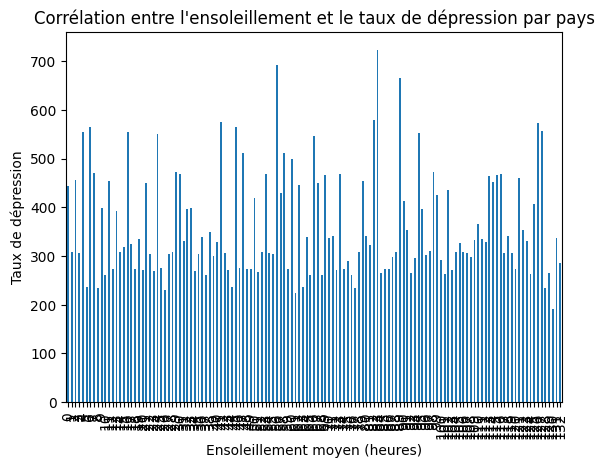

In [130]:
taux_depression = df['Taux de dépression'].sort_index()
taux_depression.plot(kind='bar', xlabel='Ensoleillement moyen (heures)', ylabel='Taux de dépression', title='Corrélation entre l\'ensoleillement et le taux de dépression par pays')
